# Distribuciones en forma de anillo

In [5]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def ring(rmin=0, rmax=1, n_samples=360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(rmin, rmax, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

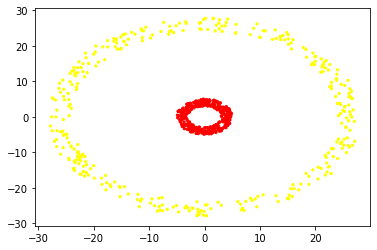

In [7]:
data1 = ring(3, 5)
data2 = ring(24, 28)

data = np.concatenate([data1, data2], axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:, 0], data[:, 1], c=labels, s=5, cmap="autumn")

# Algoritmo con KMeans

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(2).fit(data)

In [10]:
clust = km.predict(data)

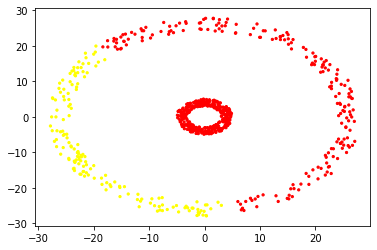

In [11]:
plt.scatter(data[:, 0], data[:, 1], c=clust, s=5, cmap="autumn")

# Algoritmo de los K Medoides

In [14]:
from pyclust import KMedoids

In [17]:
kmed = KMedoids(2).fit_predict(data)

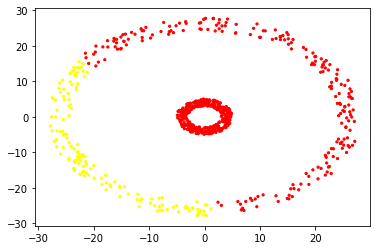

In [18]:
plt.scatter(data[:, 0], data[:, 1], c=kmed, s=5, cmap="autumn")

# Algoritmo del Clustering Espectral

In [19]:
from sklearn.cluster import SpectralClustering

In [21]:
clust = SpectralClustering(2).fit_predict(data)

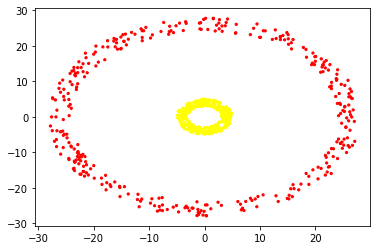

In [22]:
plt.scatter(data[:, 0], data[:, 1], c=clust, s=5, cmap="autumn")

* Podemos estimar la k?
    * No: Propagación de la afinidad.
    * Sí: Podemos usar la distancia Euclidea?
        * Sí: K-Means.
        * No: Buscar valores centrales?
            * Sí: K-Medoides.
            * No: Los datos son linealmente separables?
                * Sí: Clustering aglomerativo.
                * No: Clustering espectral.